<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/CNN_mnist_Modeling_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST - Categorical Classification
Convolutional Neural Network(CNN)


## 0. Import Keras

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import keras

keras.__version__

'2.4.3'

## 1.MNIST Data_Set Load

In [4]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## 2.Data Preprocessing


### 1)Reshape and Normalization
* reshape

In [5]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

* Normalization

In [6]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

### 2)One Hot Encoding

In [7]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 3.MNIST Keras Modeling

### 1)Model Define
* Feature Extraction Layer

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

#CNN
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


* Classification Layer

In [12]:
#DNN
model.add(layers.Flatten())
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dense(units = 10, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### 2)Model Compile
* 모델 학습방법 설정

In [14]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

### 3)Model Fit
* 약 5분


In [16]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 35s 6ms/step - loss: 0.5815 - accuracy: 0.8129 - val_loss: 0.0807 - val_accuracy: 0.9762
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0669 - accuracy: 0.9783 - val_loss: 0.0436 - val_accuracy: 0.9882
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0467 - val_accuracy: 0.9861
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0579 - val_accuracy: 0.9842
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0390 - val_accuracy: 0.9902
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0169 - accuracy: 0.9954 - val_loss: 0.0377 - val_accuracy: 0.9898
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0385 - val_accuracy: 0.989

### 4)학습 결과 시각화
* Loss visualization

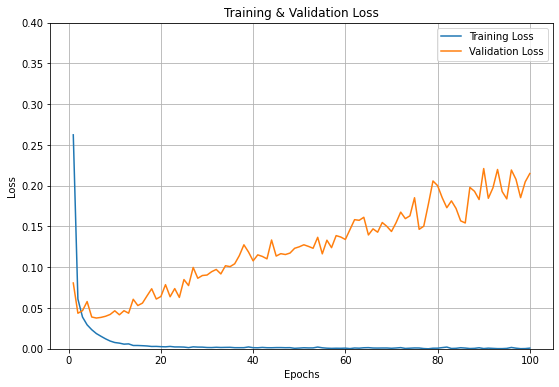

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6)) 
plt.plot(epochs, Hist_mnist.history['loss']) 
plt.plot(epochs, Hist_mnist.history['val_loss']) 
plt.ylim(0, 0.4) 
plt.title('Training & Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend(['Training Loss', 'Validation Loss']) 
plt.grid() 
plt.show()

### 5)Model Evaluate
* Loss & Accuracy

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1359 - accuracy: 0.9927
Loss = 0.13589
Accuracy = 0.99270


본 내용은 2021/03/22(월)에 학습한 내용입니다.